In [ ]:
import os 
import cv2
import cv2
import skimage
from skimage.restoration import estimate_sigma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Create datasets directories

First, we begin with creating the directories where we are going to store our processed images

In [ ]:
#os.makedirs('/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images')
images_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images'
#os.makedirs('/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/training_data')
training_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/training_data'
#os.makedirs('/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/validation_data')
validation_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/validation_data'
#os.makedirs('/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/test_data')
test_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/resized_images/test_data'

## **Filtering Noise**

In order to choose the best way to filter the images noise, we are fetching the noisy images from a specific folder and after that applying several denoising techniques 

In [ ]:
import math
from scipy.signal import convolve2d

We are using the **estimate_sigma** module from **skimage restoration** to estimate the noise in one image

In [ ]:
def noisy_images(folder_path):

  noised_images=[]
  for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path,img))
    noise= estimate_sigma(image, multichannel=True, average_sigmas=True)

    if noise>10:
      noised_images.append(img)

  return noised_images 

In [ ]:
path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/Images/n02086079-Pekinese'
noisy_images(path)

['n02086079_12125.jpg', 'n02086079_15979.jpg', 'n02086079_16979.jpg']

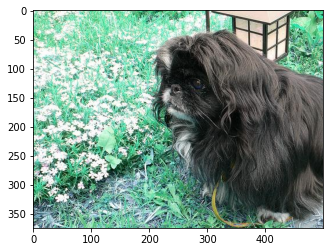

In [ ]:
plt.imshow(cv2.imread(os.path.join(path,'n02086079_12125.jpg')))

In [ ]:
noised_images=['n02086079_12125.jpg', 'n02086079_15979.jpg', 'n02086079_16979.jpg']

In [ ]:
def get_noise(image):

  noise= estimate_sigma(image, multichannel=True, average_sigmas=True)

  return noise


these are the several techniques we used to remove the noise: 

- Blurring Filter

- Gaussian Blurring Filter

- Median Blurring Filter

- FastNlMeanDenoising for colored images

In [ ]:
for image in noised_images:

  original_image=cv2.imread(os.path.join(path,image), cv2.IMREAD_UNCHANGED)
  average=cv2.blur(original_image,(5,5))
  gaussian=cv2.GaussianBlur(original_image,(5,5),0,borderType=cv2.BORDER_CONSTANT)
  median=cv2.medianBlur(original_image,5)
  local_means=cv2.fastNlMeansDenoisingColored(original_image,None,10,10,7,21)

  print(f'orginal noise:: {get_noise(original_image)}, average noise: {get_noise(average)},_ gaussian noise {get_noise(gaussian)}, median noise {get_noise(median)}, non-local-mean noise {get_noise(local_means)}')


orginal noise:: 12.590001523253022, average noise: 0.6486384705962033, gaussian noise 0.8626336680850368, median noise 1.6753920814164103, non-local-mean noise 3.951409621190731
orginal noise:: 17.47773535818672, average noise: 0.7600713214270852, gaussian noise 0.9530786806984012, median noise 1.7240789139552788, non-local-mean noise 13.419190251084222
orginal noise:: 10.713739451001786, average noise: 0.6171567132699319, gaussian noise 0.8046996166263575, median noise 1.3970274506997302, non-local-mean noise 4.707915675973422


In [ ]:
def display(a, b, c, d, e, title1 = "Original", title2 = "average", title3 = "gaussian", title4 = "median", title5 = "local_means"):
    plt.figure(figsize=(12,10))
    plt.subplot(231), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(232), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(233), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(234), plt.imshow(d), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.subplot(235), plt.imshow(e), plt.title(title5)
    plt.xticks([]), plt.yticks([])
    plt.show()

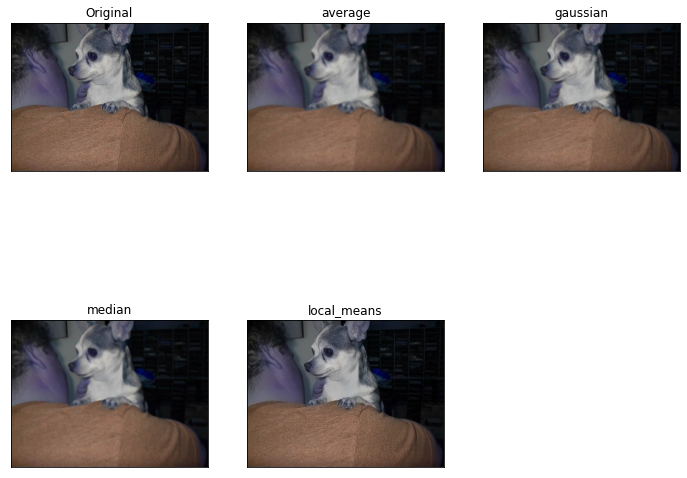

In [ ]:
display(original_image,average_image,gaussian_image,median_image,local_means_image)


We are choosing the non-local-mean denoising technique because it's well suited for colored images

## **Equalization**

Histogram Equalization is simple words is the way to improve the contrast of the image.

We are going to explore two major techniques which are: 

- **EqualizeHist** from the open CV

- **Contrast Limited Adaptive Histogram Equalization**

###  histogram equalization technique

In [ ]:
original_image=cv2.imread(source_image)

In [ ]:
b,g,r = cv2.split(original_image)
equ_b = cv2.equalizeHist(b )
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)
equ = cv2.merge((equ_b, equ_g, equ_r))

In [ ]:
equ.shape

(375, 500, 3)

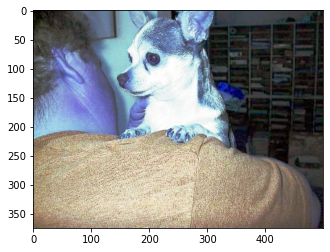

In [ ]:
plt.imshow(equ)

- It is true that the background contrast has improved after histogram equalization.

- But compare the face of the dog with the original image. We lost most of the information there due to over-brightness.

- It is because its histogram is not confined to a particular region as we saw in previous cases

### Contrast Limited Adaptive Histogram Equalization

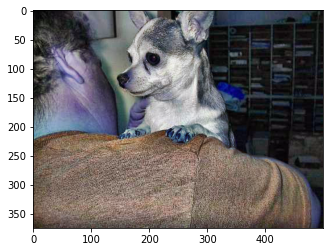

In [ ]:
b,g,r = cv2.split(original_image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8), )
cl1_b = clahe.apply(b)
cl1_g = clahe.apply(g)
cl1_r = clahe.apply(r)

cl1 = cv2.merge((cl1_b, cl1_g, cl1_r))
plt.imshow(cl1)

So to solve this problem, **adaptive histogram equalization** is used.

- In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual.

- So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, **contrast limiting** is applied.

### Compare resluts

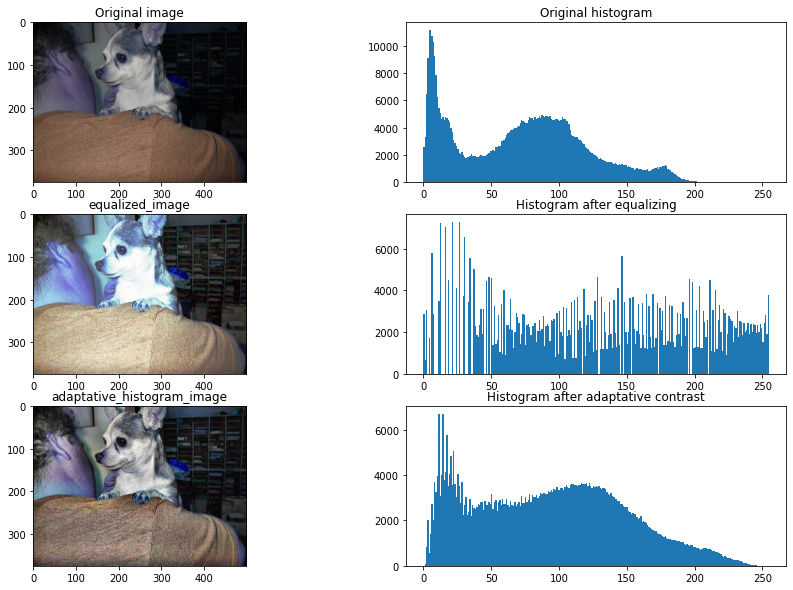

In [ ]:
f = plt.figure(figsize=(15, 10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)
ax1.imshow(original_image)
ax1.set_title('Original image')
ax2.hist(original_image.flatten(), bins=range(256))
ax2.set_title('Original histogram')
ax3.imshow(equ)
ax3.set_title('equalized_image')
ax4.hist(equ.flatten(), bins=range(256))
ax4.set_title('Histogram after equalizing')
ax5.imshow(cl1)
ax5.set_title('adaptative_histogram_image')
ax6.hist(cl1.flatten(), bins=range(256))
ax6.set_title('Histogram after adaptative contrast')
plt.show()

As we can see, with the adaptative equalization technique we have both the brightness of the image and the details of each aspect 

In [ ]:
def equalize_img(image):

  if (len(image.shape)<3):

    clahe_gey = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    res = clahe_grey.apply(img)
  
  else:
    #segregate color streams
    b,g,r = cv2.split(image)

    #create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    cl1_b = clahe.apply(b)
    cl1_g = clahe.apply(g)
    cl1_r = clahe.apply(r)
    #merge all photos 
    res = cv2.merge((cl1_b, cl1_g, cl1_r))

  return res

## Image processing

these are the steps we used in our data processing: 

- setting the size of images 

- Creating a breed folder in the each directory we did create before 

- we read the image and convert it to a numpy ndarray

- we resize our image to the size we allready set

- we perform equalization to the image 

- then the FastNLdenoing technique

- finally we recreate the image from the numpy array we have 

In [ ]:
images_folder_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/Images/'
new_width=224
new_height=224
dsize=(new_width,new_height)
#breeds_list=os.listdir(images_folder_path)
for breed_index, breed_file in enumerate(listt):


  #createa subfile for each breed in each directory
  breed=' '.join(word for word in breed_file.split('-')[1:])
  os.makedirs(os.path.join(training_path,breed))
  os.makedirs(os.path.join(validation_path,breed))
  os.makedirs(os.path.join(test_path,breed))

  #resize images
  breed_photos=os.listdir(os.path.join(images_folder_path,breed_file))

  for dog in breed_photos[:round(0.65*len(breed_photos))]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21)

    cv2.imwrite(os.path.join(training_path,breed,dog),output)

  for dog in breed_photos[round(0.65*len(breed_photos)):round(0.85*len(breed_photos))]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21)

    cv2.imwrite(os.path.join(validation_path,breed,dog),output)

  for dog in breed_photos[round(0.85*len(breed_photos)):]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21)

    cv2.imwrite(os.path.join(test_path,breed,dog),output)

  print('{} breed with index {} is loaded'.format(breed,breed_index+1))

Old_English_sheepdog breed with index 1 is loaded
Border_collie breed with index 2 is loaded
Doberman breed with index 3 is loaded
Bouvier_des_Flandres breed with index 4 is loaded
komondor breed with index 5 is loaded
miniature_pinscher breed with index 6 is loaded
Greater_Swiss_Mountain_dog breed with index 7 is loaded
Tibetan_mastiff breed with index 8 is loaded
boxer breed with index 9 is loaded
Great_Dane breed with index 10 is loaded
French_bulldog breed with index 11 is loaded
Bernese_mountain_dog breed with index 12 is loaded
Saint_Bernard breed with index 13 is loaded
Appenzeller breed with index 14 is loaded
EntleBucher breed with index 15 is loaded
bull_mastiff breed with index 16 is loaded
Eskimo_dog breed with index 17 is loaded
malamute breed with index 18 is loaded
Pomeranian breed with index 19 is loaded
Great_Pyrenees breed with index 20 is loaded
Samoyed breed with index 21 is loaded
basenji breed with index 22 is loaded
Newfoundland breed with index 23 is loaded
Leon

In [ ]:
images_folder_path='/content/drive/MyDrive/Formation_Machine_Learning/P6/data/Images/'
new_width=224
new_height=224
dsize=(new_width,new_height)
breeds_list=os.listdir(images_folder_path)
for breed_index, breed_file in enumerate([brand for brand in breeds_list):


  #createa subfile for each breed in each directory
  breed=' '.join(word for word in breed_file.split('-')[1:])
  os.makedirs(os.path.join(training_path,breed))
  os.makedirs(os.path.join(validation_path,breed))
  os.makedirs(os.path.join(test_path,breed))

  #resize images
  breed_photos=os.listdir(os.path.join(images_folder_path,breed_file))

  for dog in breed_photos[:round(0.65*len(breed_photos))]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21 )

    cv2.imwrite(os.path.join(training_path,breed,dog),output)

  for dog in breed_photos[round(0.65*len(breed_photos)):round(0.85*len(breed_photos))]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21)

    cv2.imwrite(os.path.join(validation_path,breed,dog),output)

  for dog in breed_photos[round(0.85*len(breed_photos)):]:

    source=cv2.imread(os.path.join(images_folder_path,breed_file,dog),cv2.IMREAD_UNCHANGED)

    output=cv2.resize(source,dsize)

    output=cv2.fastNlMeansDenoisingColored(equalize_img(output),None,3,10,7,21)

    cv2.imwrite(os.path.join(test_path,breed,dog),output)

  print('{} breed with index {} is loaded'.format(breed,breed_index+1))